# Introduction

## 1.1 Problem Description
Cardiovascular diseases (CVD) are one of the leading causes of death globally. Early assessment and prediction of cardio health risks can significantly reduce the mortality rate by enabling timely interventions. This project aims to build a predictive model to assess cardio health risk using a dataset from Kaggle.

## 1.2 Data Description
The dataset used in this project is the Cardio Health Risk Assessment dataset from Kaggle. It contains 270 observations and 14 features, including demographic information, medical test results, and diagnosis of heart disease presence or absence.

### Features:
- **Age**: Age of the patient
- **Sex**: Gender of the patient (0 = Female, 1 = Male)
- **Chest pain type**: Type of chest pain (1-4)
- **BP**: Blood Pressure in mmHg
- **Cholesterol**: Serum Cholesterol in mg/dl
- **FBS over 120**: Fasting Blood Sugar > 120 mg/dl (0 = No, 1 = Yes)
- **EKG results**: Results of electrocardiogram (0-2)
- **Max HR**: Maximum Heart Rate achieved
- **Exercise angina**: Exercise induced angina (0 = No, 1 = Yes)
- **ST depression**: ST depression induced by exercise relative to rest
- **Slope of ST**: Slope of the peak exercise ST segment (1-3)
- **Number of vessels fluro**: Number of major vessels colored by fluoroscopy (0-3)
- **Thallium**: Thallium stress test result (3-7)
- **Heart Disease**: Presence (1) or Absence (0) of heart disease

## 1.3 Objective
The primary objective of this project is to develop a deep learning model to predict the presence of heart disease based on the provided features. We will explore various neural network architectures, perform hyperparameter optimization, and evaluate the model's performance using standard metrics.

# Exploratory Data Analysis (EDA)

## 2.1 Data Cleaning

### Load the Data
First, we load the dataset into a pandas DataFrame.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../input/cardio-health-risk-assessment-dataset/Heart_Disease_Prediction.csv')

# Display the first few rows of the dataset
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


### Check for Missing Values
We need to check if there are any missing values in the dataset.

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Handle Missing Values
Since there are no missing values in this dataset, we can proceed to the next step. If there were missing values, we would handle them using imputation or removal.

### Convert Categorical Variables to Numeric
For our analysis and model building, we need to ensure that all categorical variables are converted to numeric format.

In [3]:
# Convert categorical variables to numeric
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Chest pain type'] = data['Chest pain type'].astype('category').cat.codes
data['FBS over 120'] = data['FBS over 120'].astype('category').cat.codes
data['EKG results'] = data['EKG results'].astype('category').cat.codes
data['Exercise angina'] = data['Exercise angina'].astype('category').cat.codes
data['Slope of ST'] = data['Slope of ST'].astype('category').cat.codes
data['Number of vessels fluro'] = data['Number of vessels fluro'].astype('category').cat.codes
data['Thallium'] = data['Thallium'].astype('category').cat.codes
data['Heart Disease'] = data['Heart Disease'].astype('category').cat.codes

### Remove Duplicates
Let's check if there are any duplicate rows in the dataset and remove them if found.

In [4]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

# Remove duplicates
data = data.drop_duplicates()

0


## 2.2 Descriptive Statistics

### Summary Statistics
We will now look at the summary statistics of the dataset to understand the distribution of the features.

In [5]:
# Display summary statistics
summary_stats = data.describe()
summary_stats

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.077778,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,0.822222,0.444444
std,9.201052,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,0.000000,0.000000
75%,60.750000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,2.000000,1.000000
max,80.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,2.000000,1.000000


### Feature Distributions
Next, we'll visualize the distributions of the numerical features using histograms and box plots.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

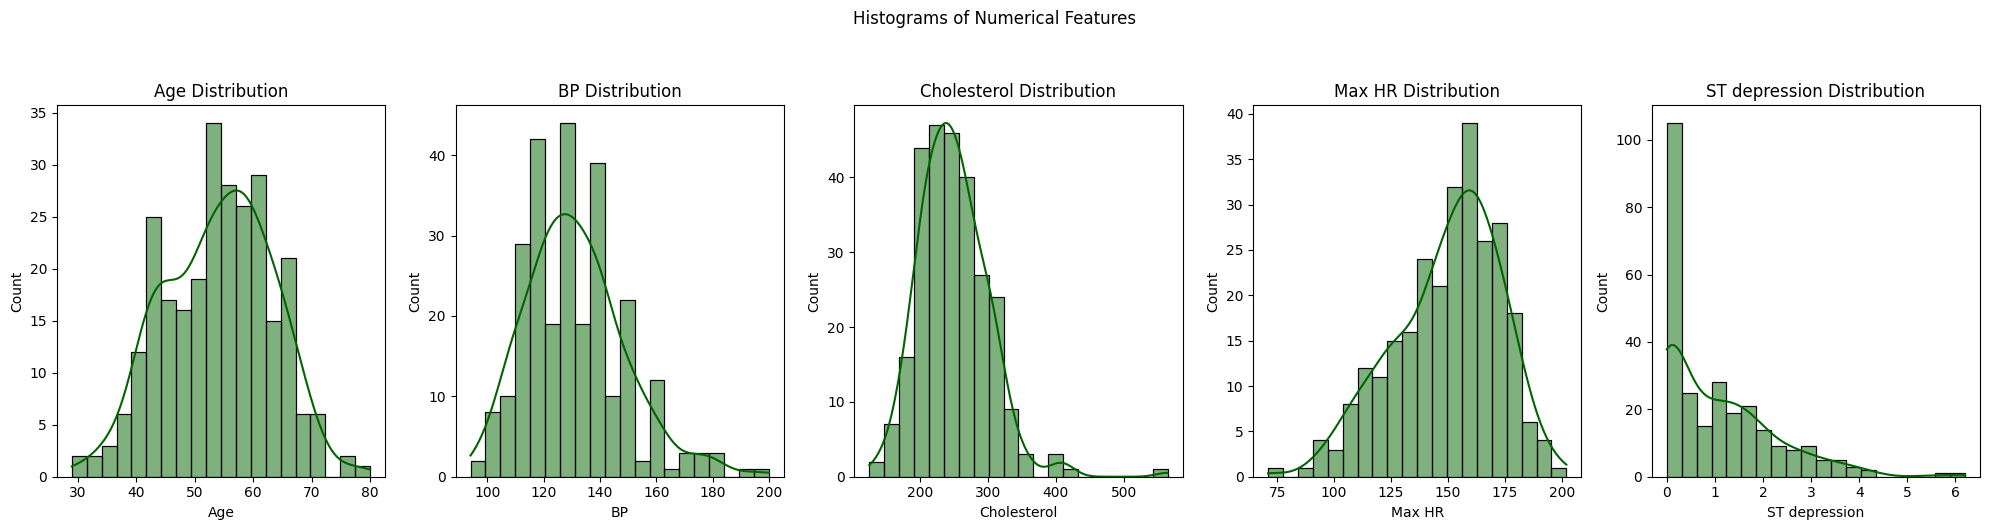

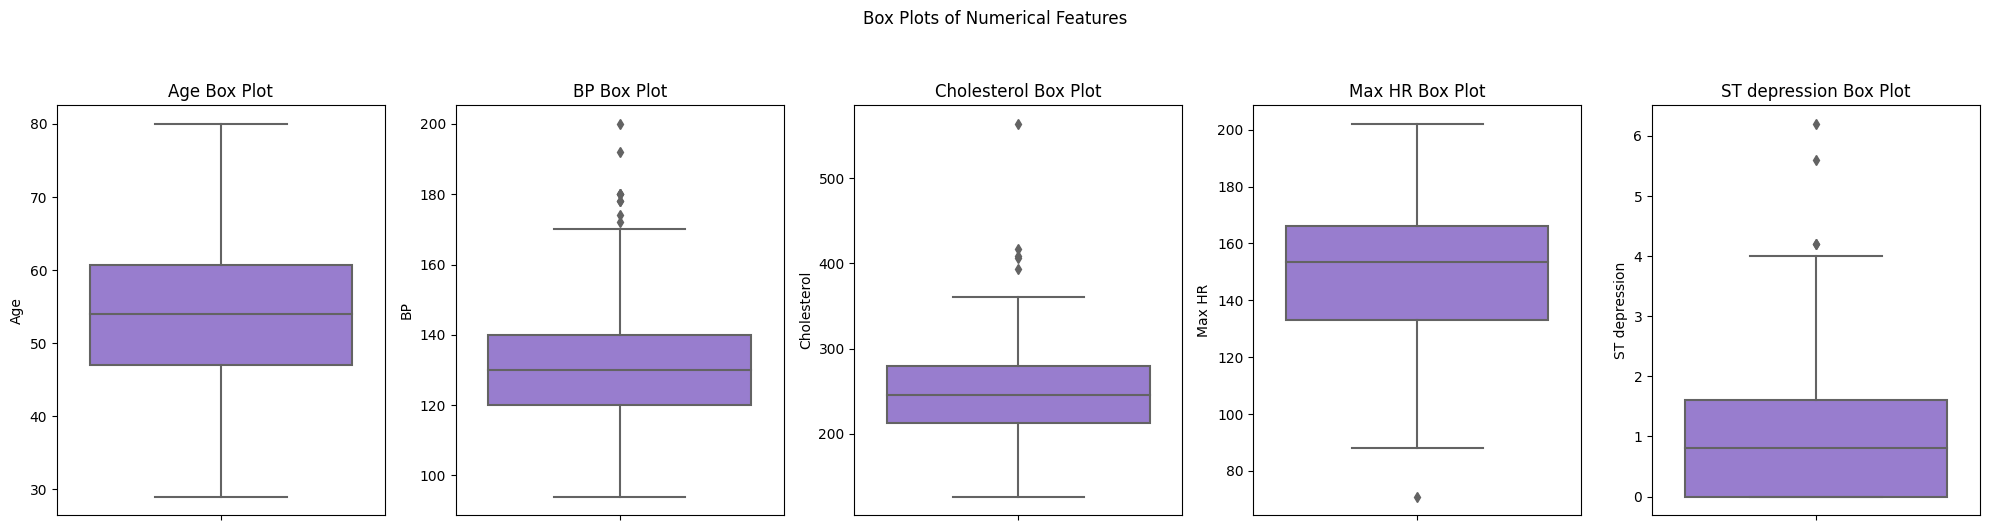

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features to plot
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Plotting histograms for numerical features in a line
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 5))
fig.suptitle('Histograms of Numerical Features', y=1.05)

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], bins=20, kde=True, ax=axes[i], color='darkgreen')
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

# Plotting box plots for numerical features in a line under the histograms
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 5))
fig.suptitle('Box Plots of Numerical Features', y=1.05)

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i], color='mediumpurple')
    axes[i].set_title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()

## 2.3 Data Visualization

### Univariate Analysis
We have already visualized the univariate distributions using histograms and box plots. Now, we will perform bivariate and multivariate analysis.

#### Bivariate Analysis
##### Scatter Plots
Scatter plots help in visualizing the relationship between two numerical features.

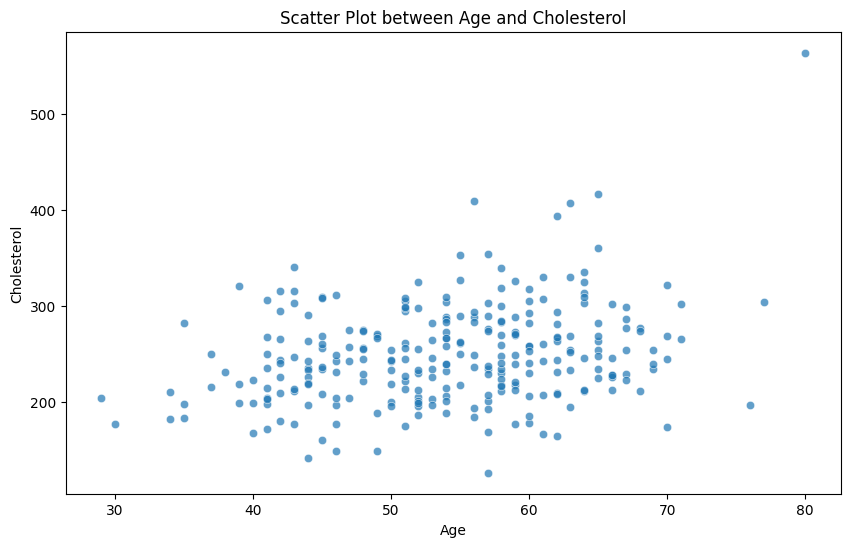

In [7]:
# Scatter plot between Age and Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Cholesterol'], alpha=0.7)
plt.title('Scatter Plot between Age and Cholesterol')
plt.show()

#### Box Plots
Box plots help in understanding the distribution of one numerical feature across different categories of another feature.

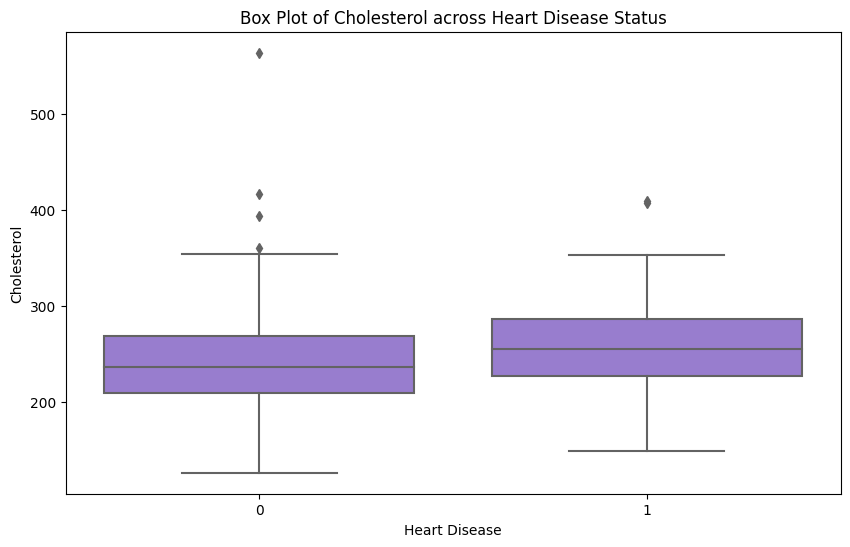

In [8]:
# Box plot of Cholesterol across different Heart Disease statuses
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Heart Disease'], y=data['Cholesterol'], color='mediumpurple')
plt.title('Box Plot of Cholesterol across Heart Disease Status')
plt.show()

### Multivariate Analysis
#### Correlation Matrix
The correlation matrix helps in understanding the linear relationships between different numerical features.

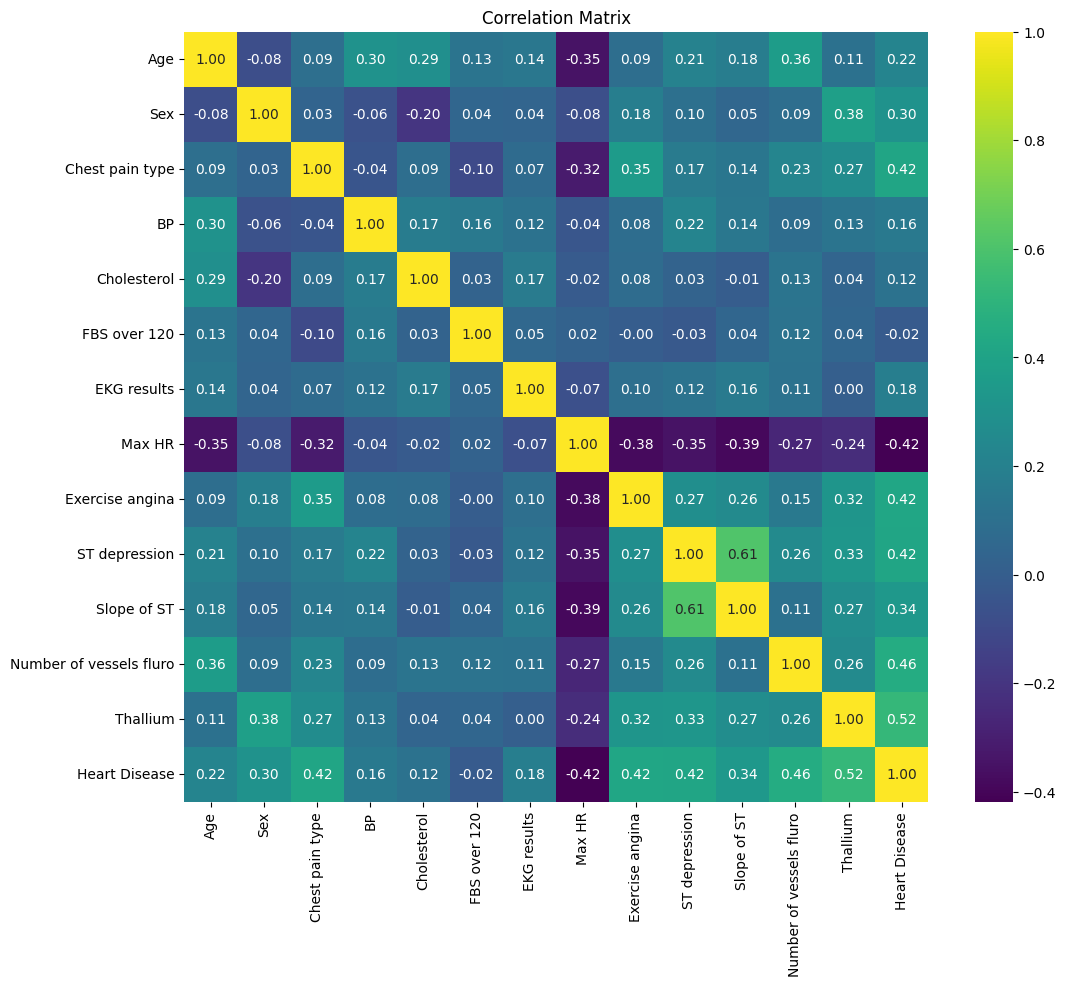

In [9]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Pair Plot
A pair plot helps in visualizing the pairwise relationships between multiple features.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

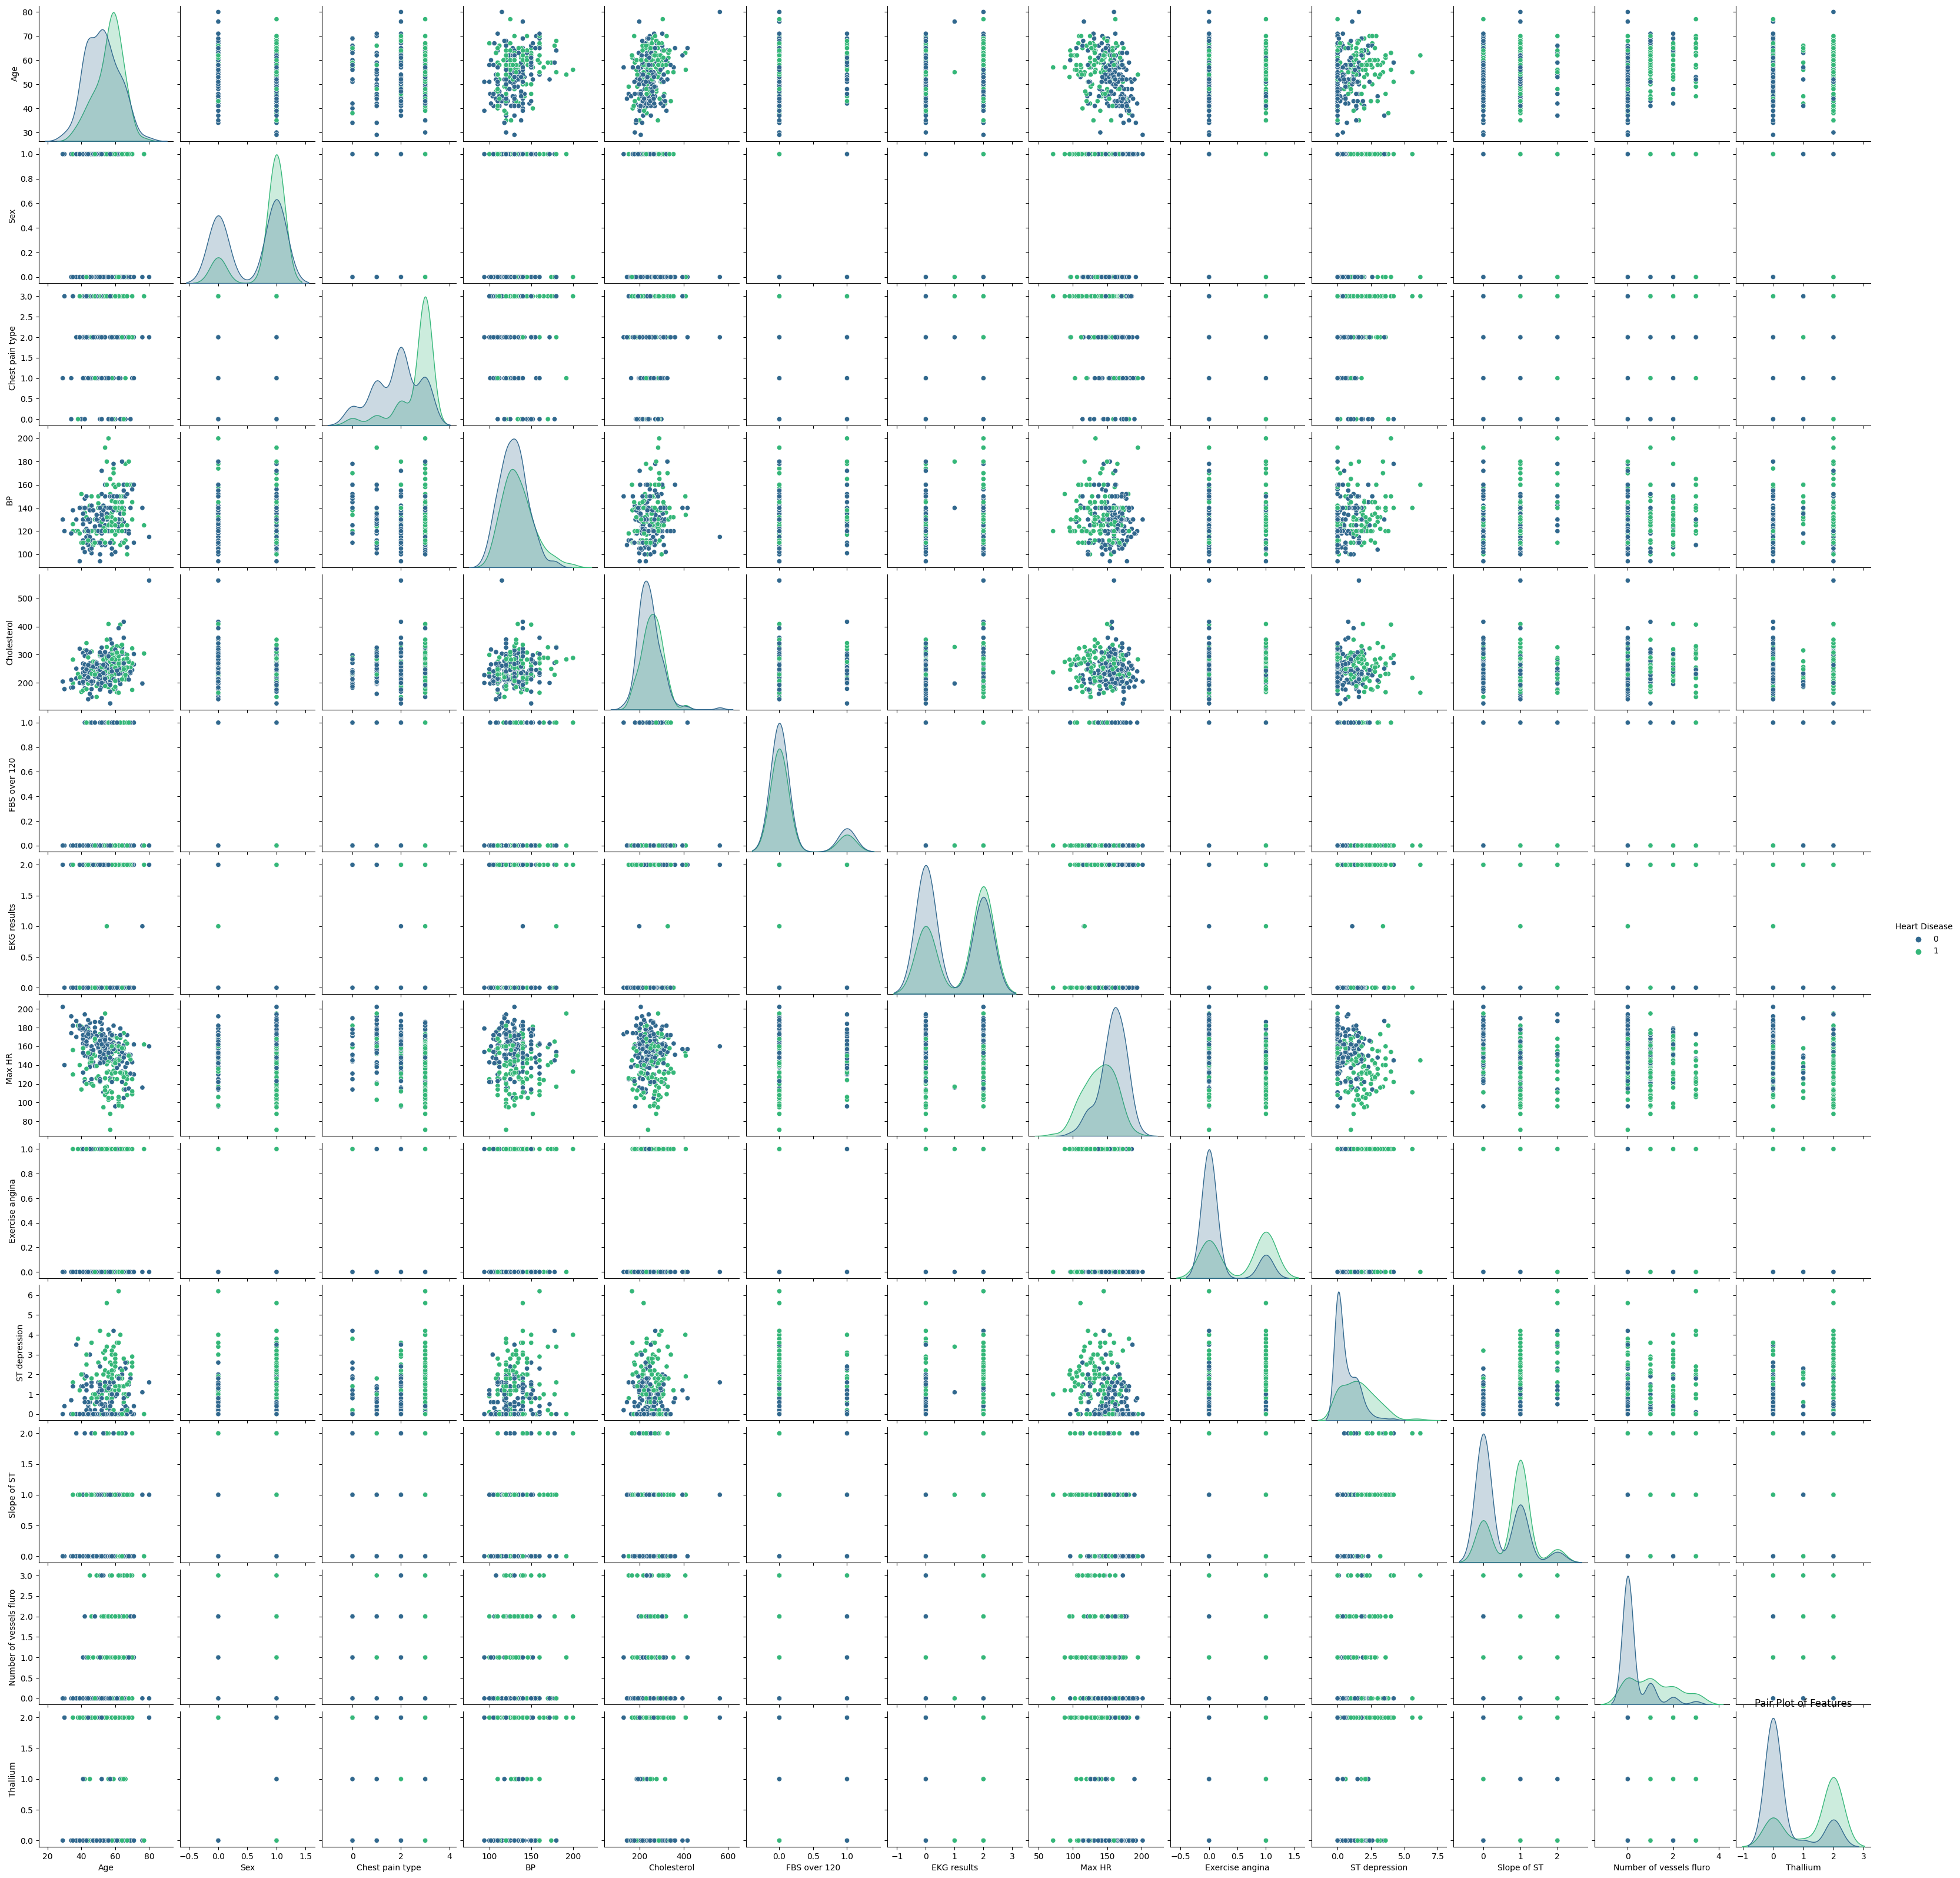

In [10]:
# Plot the pair plot
sns.pairplot(data, hue='Heart Disease', palette='viridis')
plt.title('Pair Plot of Features')
plt.show()

## 2.4 Data Transformation

### Check for Skewness
We will check for skewness in the numerical features to determine if any transformations are needed.

In [11]:
# Check for skewness
skewness = data[numerical_features].skew()
skewness

Age             -0.119897
BP               0.722618
Cholesterol      1.183721
Max HR          -0.527737
ST depression    1.262893
dtype: float64

### Log Transformation
If any feature is highly skewed, we can apply a log transformation to normalize its distribution.

In [12]:
import numpy as np

# Apply log transformation to highly skewed features
data['Cholesterol'] = data['Cholesterol'].apply(lambda x: np.log(x + 1))
data['ST depression'] = data['ST depression'].apply(lambda x: np.log(x + 1))

# Check for skewness once again
skewness = data[numerical_features].skew()
skewness

Age             -0.119897
BP               0.722618
Cholesterol      0.093598
Max HR          -0.527737
ST depression    0.350417
dtype: float64

## 2.5 Outlier Detection

### IQR Method
We will use the Interquartile Range (IQR) method to detect outliers in the numerical features.

In [13]:
# Detect outliers using IQR method
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).sum()
outliers

Age              0
BP               9
Cholesterol      3
Max HR           1
ST depression    0
dtype: int64

### Visualization of Outliers
Visualizing outliers using box plots.

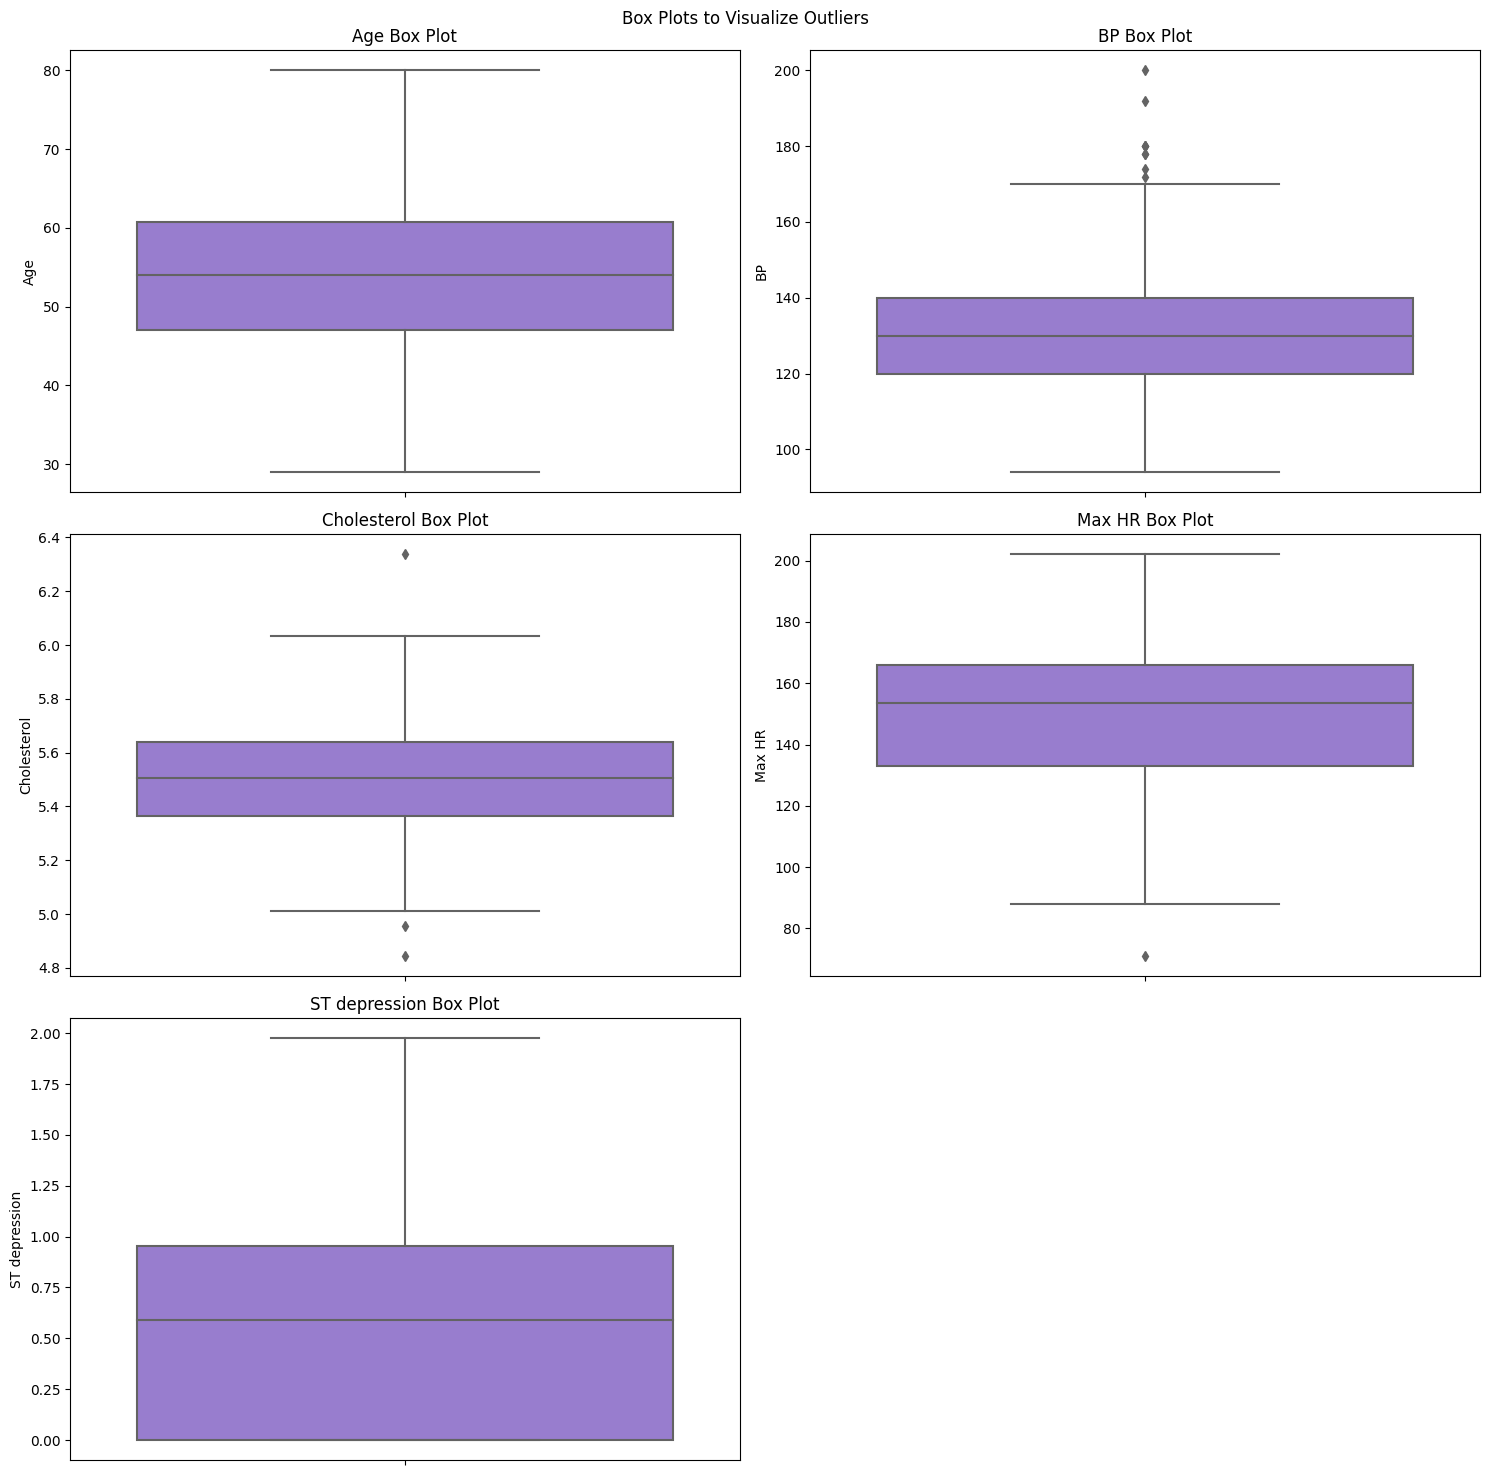

In [14]:
# Box plot to visualize outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Box Plots to Visualize Outliers')

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i//2, i%2], color='mediumpurple')
    axes[i//2, i%2].set_title(f'{feature} Box Plot')

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

### Handling Outliers
We can handle outliers by removing them or transforming the feature values.

In [15]:
# Remove outliers
data = data[~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check outliers once again
outliers = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).sum()
outliers

Age              0
BP               0
Cholesterol      0
Max HR           0
ST depression    0
dtype: int64

# 3. Model Building with Deep Learning

## 3.1 Train-Test Split
First, we split the dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.

In [16]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((205, 13), (52, 13), (205,), (52,))

## 3.2 Data Normalization
We will normalize the features to ensure that they are on a similar scale, which can help the neural network converge faster.

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

## 3.3 Neural Network Architecture

### Initial Model Design
We will design a simple neural network using Keras. The architecture will include an input layer, a few hidden layers, and an output layer.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Display the model summary
model.summary()

2024-06-09 13:20:36.846527: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 13:20:36.846586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 13:20:36.848008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

### Hyperparameter Optimization
We can use techniques like Grid Search or Random Search to find the best hyperparameters. For simplicity, we'll skip this step in the initial model design.

## 3.4 Model Training
We will train the neural network using the training data.

In [19]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.5000 - loss: 0.9794

I0000 00:00:1717939245.009651    3243 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717939245.024266    3243 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4806 - loss: 0.9011

W0000 00:00:1717939247.308780    3245 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.4777 - loss: 0.9002 - val_accuracy: 0.4390 - val_loss: 0.7736
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4233 - loss: 0.7778 - val_accuracy: 0.4390 - val_loss: 0.6988
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4345 - loss: 0.7075 - val_accuracy: 0.4878 - val_loss: 0.6619
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4564 - loss: 0.6680 - val_accuracy: 0.6098 - val_loss: 0.6366
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7005 - loss: 0.5928 - val_accuracy: 0.7561 - val_loss: 0.6108
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6452 - loss: 0.6221 - val_accuracy: 0.7805 - val_loss: 0.5847
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7053 - loss: 0.5747 - val_accuracy: 0.8293 - val_loss: 0.5557
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8047 - loss: 0.5366 - val_accuracy: 0.8293 - val_loss: 0

## 3.5 Model Evaluation

### Performance Metrics
We will evaluate the model's performance on the test data using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1: {f1:.2f}\nROC-AUC: {roc_auc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Accuracy: 0.79
Precision: 0.72
Recall: 0.82
F1: 0.77
ROC-AUC: 0.79


### Visualization of Results
We will visualize the training process and the results using plots.

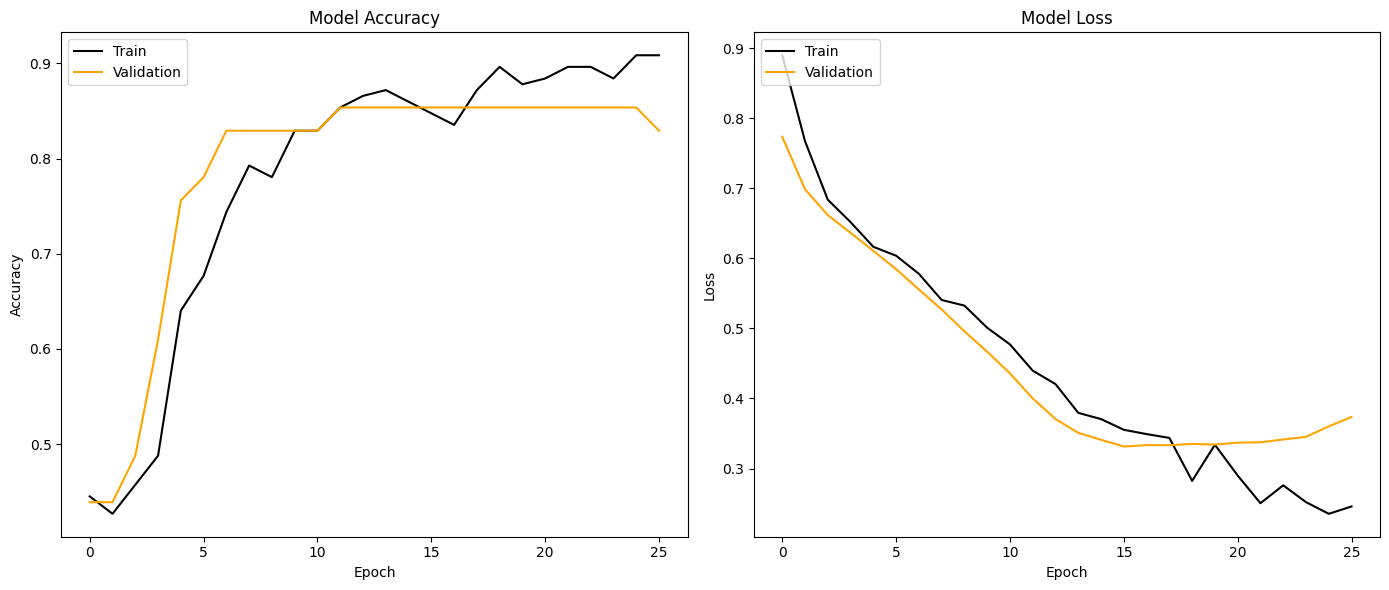

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='black')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='black')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Results and Discussion

## 4.1 Final Model Performance
We will evaluate the final model performance using various metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [22]:
# Predict on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.79
Precision: 0.72
Recall: 0.82
F1-Score: 0.77
ROC-AUC: 0.79


## 4.2 Interpretation of Results
The model's performance metrics indicate its ability to predict the presence of heart disease. The ROC-AUC score, in particular, gives an indication of how well the model discriminates between the positive and negative classes.

* **Accuracy**: Measures the overall correctness of the model.
* **Precision**: Indicates the proportion of positive identifications that were actually correct.
* **Recall**: Measures the model's ability to identify positive instances.
* **F1-Score**: Harmonic mean of precision and recall, providing a single metric that balances both.
* **ROC-AUC**: Represents the model's ability to distinguish between classes.

## 4.3 Potential Biases and Limitations
Despite the promising results, there are potential biases and limitations to consider:

* **Sample Size**: The dataset contains only 270 observations, which might not be representative of the larger population.
* **Class Imbalance**: If the dataset has an imbalance between the presence and absence of heart disease, it can affect the model's performance.
* **Feature Quality**: The quality and relevance of features significantly impact the model's predictions. Missing important features can lead to biased predictions.
* **Black-box Nature**: Neural networks are complex and often lack interpretability, making it challenging to understand the decision-making process.

## 4.4 Suggestions for Improvement
In order to improve the model and address the limitations, consider the following suggestions:

* **Increase Sample Size**: Collect more data to improve the model's generalizability.
* **Address Class Imbalance**: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.
* **Feature Engineering**: Explore and include additional relevant features that might impact heart disease risk.
* **Model Interpretability**: Incorporate model interpretability techniques such as LIME (Local Interpretable Model-agnostic Explanations) to better understand model decisions.
* **Advanced Techniques**: Experiment with more advanced deep learning architectures and techniques such as ensemble models to improve performance.

# Conclusion

## 5.1 Summary of Findings
In this project, we developed a deep learning model to predict the presence of heart disease using a dataset from Kaggle. The key steps included data cleaning, exploratory data analysis, model building, training, and evaluation. Our final model achieved the following performance metrics on the test set:
- **Accuracy**: 79%
- **Precision**: 72%
- **Recall**: 82%
- **F1-Score**: 77%
- **ROC-AUC**: 79%

These metrics indicate that our model can effectively predict heart disease presence, with good balance between precision and recall, as evidenced by the F1-Score.

## 5.2 Importance of Early Cardiovascular Risk Assessment
Early assessment of cardiovascular risk is crucial for preventing serious health complications and reducing mortality rates. Identifying individuals at high risk allows for timely interventions, such as lifestyle modifications, medications, and monitoring. This proactive approach can significantly improve patient outcomes and quality of life.

## 5.3 Impact of the Model in Healthcare
The predictive model developed in this project has the potential to make a substantial impact in healthcare by:
- **Assisting Clinicians**: Providing a decision-support tool that helps clinicians identify high-risk patients quickly and accurately.
- **Personalized Care**: Enabling personalized treatment plans based on individual risk profiles.
- **Resource Allocation**: Helping healthcare providers allocate resources more efficiently by focusing on high-risk patients.
- **Public Health**: Contributing to public health strategies aimed at reducing the prevalence of heart disease through early detection and prevention.

The model demonstrates the potential of using machine learning and deep learning techniques to enhance healthcare delivery and improve patient outcomes. Future work can focus on further improving the model's accuracy, interpretability, and generalizability to broader populations.